In [29]:
from scipy.linalg import svd, diagsvd
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [16]:
df = pd.read_csv('data/ratings_small.csv').drop(['timestamp'], axis=1)
dfPivot = df.pivot(index='userId', columns='movieId').fillna(2.5)
matrix = dfPivot.to_numpy()
df.shape

(100004, 3)

In [17]:
indices = dfPivot.index.to_list()
columns = [i[1] for i in dfPivot.columns.to_list()]
print(indices)
print(columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [18]:
def get_User_Movie(df):
    i = df.iloc[random.randint(0,df.shape[0]-1)]
    return indices.index(i['userId']), columns.index(i['movieId'])

In [19]:
def changeValue(matrix_b, userRow, movieColumn):
    matrix_b[userRow][movieColumn] = random.randint(1, 10) / 2
    return matrix_b

In [20]:
def decomposition(matrix_b):
    [U, S, V] = svd(matrix_b)
    S[-650:] *= 0
    sigma = diagsvd(S, matrix_b.shape[0], matrix_b.shape[1])
    matrix_b = U @ sigma @ V
    
    return matrix_b

In [21]:
dfResult = pd.DataFrame()

error = []
for i in range(101):
    matrix_b = deepcopy(matrix)
    indexs = []
    for _ in range(1000):
        index, column = get_User_Movie(df)
        changeValue(matrix_b, index, column)
        indexs.append((index, column))
    matrix_b = decomposition(matrix_b)        
    errors = np.abs(matrix[np.array(indexs)[:, 0], np.array(indexs)[:, 1]] - matrix_b[np.array(indexs)[:, 0], np.array(indexs)[:, 1]])
    error.append(errors.mean())
    print(f'Iteration {i} , Error: {errors.mean()}')
dfResult['Iteration '] = range(101)
dfResult['Error'] = error

dfResult.to_csv('data/result.csv', index=False)

Iteration 0 , Error: 1.0380567099202176
Iteration 1 , Error: 1.0576954428968377
Iteration 2 , Error: 1.088355052982859
Iteration 3 , Error: 1.0759273590510292
Iteration 4 , Error: 1.0702421079483064
Iteration 5 , Error: 1.0590896677484296
Iteration 6 , Error: 1.1217160641303325
Iteration 7 , Error: 1.086521109682599
Iteration 8 , Error: 1.0484245652541881
Iteration 9 , Error: 1.0737082228588002
Iteration 10 , Error: 1.0747924969338984
Iteration 11 , Error: 1.0246524801047026
Iteration 12 , Error: 1.0966459888756832
Iteration 13 , Error: 1.06757289326882
Iteration 14 , Error: 1.0372486541067583
Iteration 15 , Error: 1.0709319526857433
Iteration 16 , Error: 1.046966266642485
Iteration 17 , Error: 1.0727725453179207
Iteration 18 , Error: 1.091793456783244
Iteration 19 , Error: 1.0502130230764724
Iteration 20 , Error: 1.0759451346808973
Iteration 21 , Error: 1.0789189242627808
Iteration 22 , Error: 1.0998201086339399
Iteration 23 , Error: 1.0740695519024317
Iteration 24 , Error: 1.11979908

In [23]:
dfCsv = pd.read_csv('data/result.csv')
average = dfCsv['Error'].mean()
std = dfCsv['Error'].std()

x = np.linspace(min(dfCsv['Error']), max(dfCsv['Error']), 100)
normal_curve = (1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - average)**2 / (2 * std**2)))

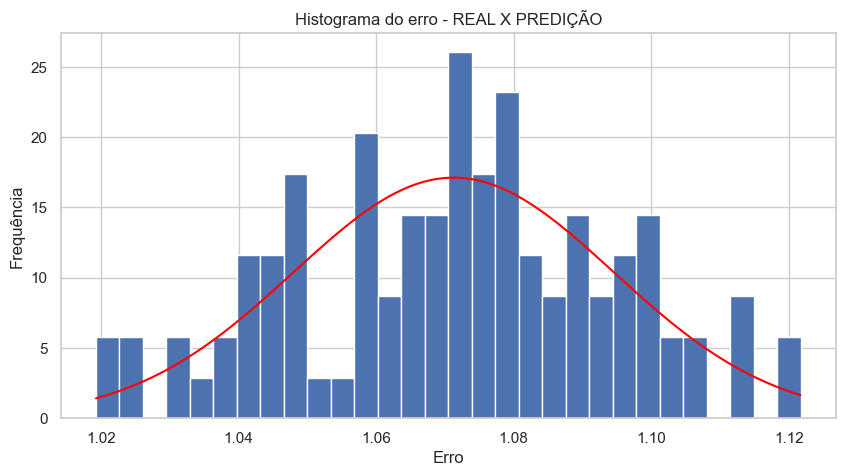

In [33]:
plt.figure(figsize=(10, 5))
plt.hist(dfCsv['Error'], bins=30, density=True)
plt.plot(x, normal_curve, color='red')
plt.title('Histograma do erro - REAL X PREDIÇÃO')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7432\2825790775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfCsv['Error'], bins=20, hist_kws={'density': True})


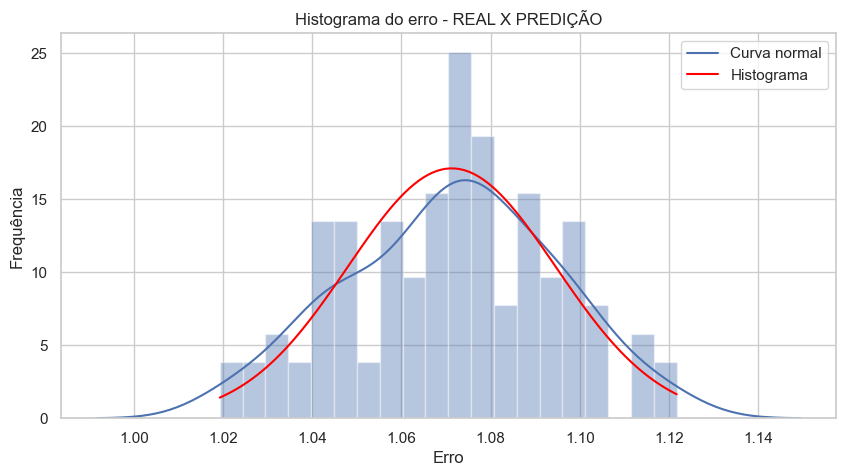

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(dfCsv['Error'], bins=20, hist_kws={'density': True})
plt.plot(x, normal_curve, color='red')
plt.title('Histograma do erro - REAL X PREDIÇÃO')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.legend(['Curva normal', 'Histograma'])
plt.show()